In [1]:
# Import Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Featurized Data

X_train_unscaled = pd.read_csv('../../data/d3_data_featurization/train_featurized.csv')
X_val_unscaled = pd.read_csv('../../data/d3_data_featurization/val_featurized.csv')
X_test_unscaled = pd.read_csv('../../data/d3_data_featurization/test_featurized.csv')
y_train = pd.read_csv('../../data/d3_data_featurization/train_labels.csv')
y_val = pd.read_csv('../../data/d3_data_featurization/val_labels.csv')
y_test = pd.read_csv('../../data/d3_data_featurization/test_labels.csv')

In [3]:
# Scaling the Data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

# Normalizing the Data

X_train = normalize(X_train)
X_val = normalize(X_val)
X_test = normalize(X_test)

In [4]:
# Load the test data
target_column_name = 'target'  # Change this to your actual target column name

# Convert y_test to a pandas Series by selecting the target column
y_test_series = y_test[target_column_name]

# Count the number of metals and non-metals
counts = y_test_series.value_counts()

# Print the counts
print("Count of Non-Metals (0):", counts.get(0, 0))
print("Count of Metals (1):", counts.get(1, 0))


Count of Non-Metals (0): 7949
Count of Metals (1): 7657


In [5]:
# Initialize the Clssifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the Classifier
rf_classifier.fit(X_train, y_train)

# Make Predictions on the Validation Set
y_val_pred_rf = rf_classifier.predict(X_val)

# Evaluate the model on Validation Set
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print("RANDOM FOREST Accuracy on Validation Set:", accuracy_val_rf)

c:\Users\aaayu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RANDOM FOREST Accuracy on Validation Set: 0.8540945790080738


In [6]:
# Make Predictions on the Testing Set
y_test_pred_rf = rf_classifier.predict(X_test)

# Make Predictions on test file
test_df = pd.read_csv("../../data/d3_data_featurization/test.csv")
test_df['predicted'] = y_test_pred_rf

# Evaluate the model on Testing Set
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print("RANDOM FOREST Accuracy on Testing Test:", accuracy_test_rf)

# Save the updated DataFrame back to a CSV file
test_df.to_csv("../../data/d4_model_development/predictions.csv", index=False)

RANDOM FOREST Accuracy on Testing Test: 0.8542868127643214


In [7]:
# Print the Classification Report

report = classification_report(y_test, y_test_pred_rf, target_names=['Non-Metal', 'Metal'])
print(report)

              precision    recall  f1-score   support

   Non-Metal       0.83      0.90      0.86      7949
       Metal       0.88      0.81      0.85      7657

    accuracy                           0.85     15606
   macro avg       0.86      0.85      0.85     15606
weighted avg       0.86      0.85      0.85     15606



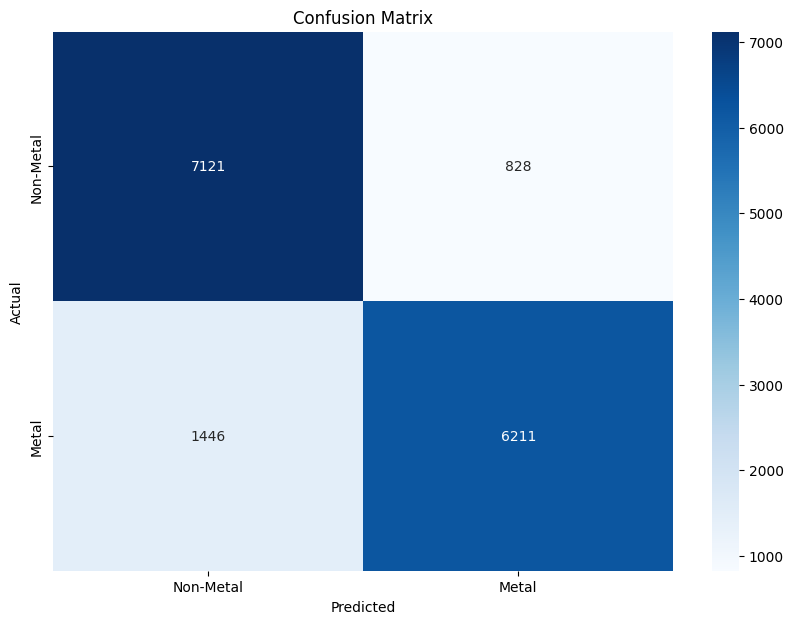

In [8]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Metal', 'Metal'], yticklabels=['Non-Metal', 'Metal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig("../../data/d4_model_development/confusion_matrix.png")
plt.show()

In [13]:
import numpy as np
import joblib

def quantize_forest(model, precision=2):
    for estimator in model.estimators_:
        estimator.tree_.value[:] = np.round(estimator.tree_.value, decimals=precision)
        estimator.tree_.impurity[:] = np.round(estimator.tree_.impurity, decimals=precision)
        estimator.tree_.n_node_samples[:] = np.round(estimator.tree_.n_node_samples, decimals=precision)
    return model

In [16]:
# Quantize the model
quantized_model = quantize_forest(rf_classifier, precision=2)

# Bundle the model and scaler together
model_and_scaler = {
    'model': quantized_model,
    'scaler': scaler
}

# Save the bundled model and scaler
joblib.dump(model_and_scaler, '../../data/d4_model_development/model.pkl', compress=3)

['../../data/d4_model_development/model.pkl']

In [9]:
# Create a dictionary to hold the model and the accuracy
model_info = {
    "model": rf_classifier,
    "scaler": scaler
}

In [10]:
# Creating a pickle file

import pickle

# Save to a pickle file
with open('../../data/d4_model_development/model.pkl', 'wb') as file:
    pickle.dump(model_info, file)